<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Parcial_1/Parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

#Ejercicios raíces de polinomios

#5.


In [ ]:
x = sym.Symbol('x',real=True)

#def derivada_central(f,x,h=0.05):
 #   d = 0.
  #  if h != 0:
   #     # Define a function using the SymPy expression f
    #    g = sym.lambdify(x, f, 'numpy')
     #   d = (g(x+h) - g(x-h))/(2*h) # Call the function g
    #return d

def L(n, x):
    return sym.exp(x) / sym.factorial(n) * sym.diff(x**n * sym.exp(-x), x)

def GetNewtonMethod(f,df,xn,itmax=1000,precision=1e-16):
  error = 1
  it = 0
  while error > precision and it < itmax:
    try:
      xn1 = xn - f(xn)/df(f,xn)
      error = np.abs(f(xn)/df(f,xn))
    except ZeroDivisionError:
      print('Division by zero error')
    xn = xn1
    it += 1
  if it == itmax:
    return False
  else:
    return xn
n_values = np.array([1,2,3,4,5])

def GetAllRoots(n_values, tolerancia = 16):
  Roots = np.array([])
  for n in n_values:
    root = GetNewtonMethod(L(n,x),sym.diff(L(n,x),x),n)
    if root != False:
      croot = np.round( root, tolerancia)
      if croot not in Roots:
        Roots = np.append(Roots,croot)
  Roots.sort()
  return Roots

raices=GetAllRoots(n_values)



TypeError: 'Mul' object is not callable

#7.

El mínimo camino óptico se encuentra en x = 2.43
Camino óptico mínimo = 4.80


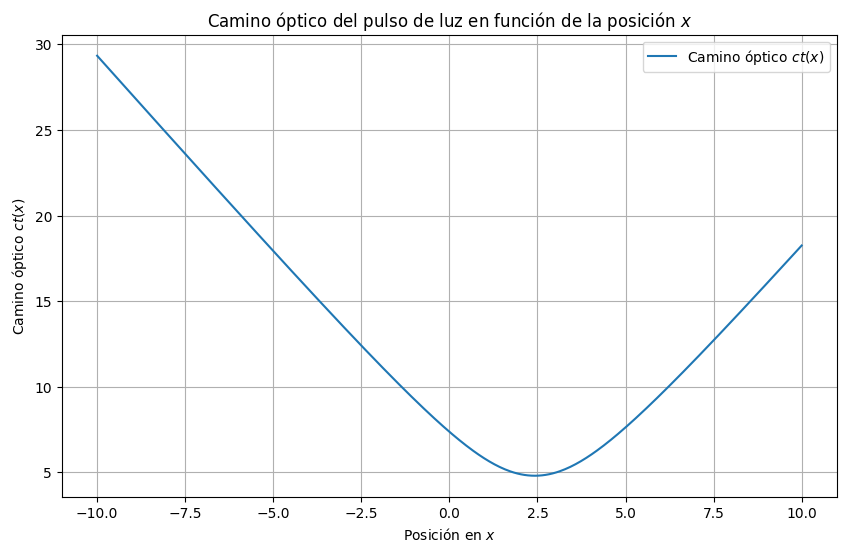

In [ ]:
#Punto b
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
def camino_opt(x, n0,n1):

    T = (-3, 2)
    R = (2, -2)

    d1=np.sqrt((x + T[0])**2 + T[1]**2)
    d2 = np.sqrt((x - R[0])**2 + (R[1])**2)
    ct_x = n0 * d1 + n1 * d2
    return ct_x
n0=1
n1=1.33
x_values = np.linspace(-10, 10, 400)
ct_values = camino_opt(x_values, n0, n1)


x_minimo = x_values[np.argmin(ct_values)]
camino_optimo_minimo = np.min(ct_values)

print(f'El mínimo camino óptico se encuentra en x = {x_minimo:.2f}')
print(f'Camino óptico mínimo = {camino_optimo_minimo:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(x_values, ct_values, label='Camino óptico $c t(x)$')
plt.xlabel('Posición en $x$')
plt.ylabel('Camino óptico $c t(x)$')
plt.title('Camino óptico del pulso de luz en función de la posición $x$')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#c

def derivada_central(x, n0, h=1e-5):
    return (camino_opt(x + h, n0, n1) - camino_opt(x - h, n0, n1)) / (2 * h)

def segunda_derivada_central(x, n0, h=1e-5):
    return (camino_opt(x + h, n0, n1) - 2 * camino_opt(x, n0, n1) + camino_opt(x - h, n0, n1)) / (h ** 2)
# Newton-Raphson para encontrar el mínimo
def newton_raphson(f, x0, tol=1e-9, max_iter=100):
    x = x0
    h=1e-5
    for i in range(max_iter):
        primera_der = derivada_central(x, n0, n1)
        segunda_der = segunda_derivada_central(x, n0, n1)
        if segunda_der == 0:
            break
        x_new = x - primera_der / segunda_der
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, camino_opt(x, n0, n1)

# Aproximación inicial
x0 = 0
x_minimo, camino_optimo_minimo = newton_raphson(x0, n0, n1)


print(f"El mínimo del tiempo se alcanza en x = {x_minimo}")

El mínimo del tiempo se alcanza en x = 2.799699888059144


In [ ]:
import numpy as np

def calcular_angulos_simplificado(x_min, T, R):
    T_x, T_y = T
    R_x, R_y = R

    alfa_0 = np.arctan(T_y / (x_min - T_x))
    alfa_0_deg = np.degrees(alpha_0)


    alfa_1 = np.arctan(R_y / (x_min - R_x))
    alfa_1_deg = np.degrees(alpha_1)

    return alfa_0_deg, alfa_1_deg
T = (-3, 2)
R = (2, -2)
alpha_0, alpha_1 = calcular_angulos_simplificado(x_minimo, T, R)

print(f'Ángulo de incidencia α0 = {alpha_0:.10f} grados')
print(f'Ángulo de refracción α1 = {alpha_1:.10f} grados')


Ángulo de incidencia α0 = 19.0265197434 grados
Ángulo de refracción α1 = -68.2060025987 grados


In [ ]:
def comprobar_snell(alfa_0,alfa_1,n1,n2):
    seno_alfa_0 = np.sin((alfa_0))
    seno_alfa_1 = np.sin((alfa_1))
    verificacion=n0*seno_alfa_0/n1*seno_alfa_1
    return verificacion
comprobar_snell(alpha_0,alpha_1,n0,n1)

0.13888128018653506

#Ejercicios interpolación

#7

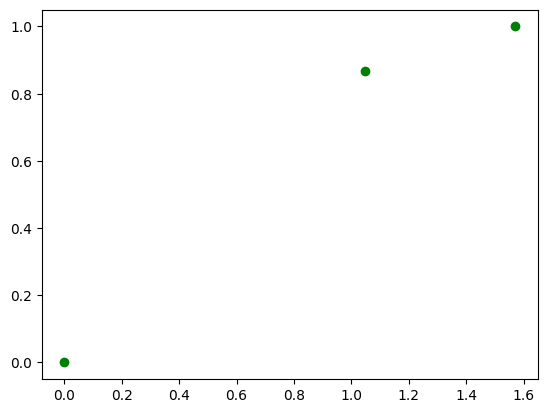

In [28]:
#punto a)
X = np.array([0,np.pi/3,np.pi/2,])
Y = np.array([np.sin(0),np.sin(np.pi/3),np.sin(np.pi/2)])
plt.scatter(X,Y,color='green')

In [29]:
x=sym.Symbol('x', real="True")

def Lagrange(x,X,i):
  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L
def Interpolate(x,X,Y):
  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

In [30]:
poly=Interpolate(x,X,Y)
poly=poly.expand()
poly

-0.363586737855857*x**2 + 1.2077404846629*x

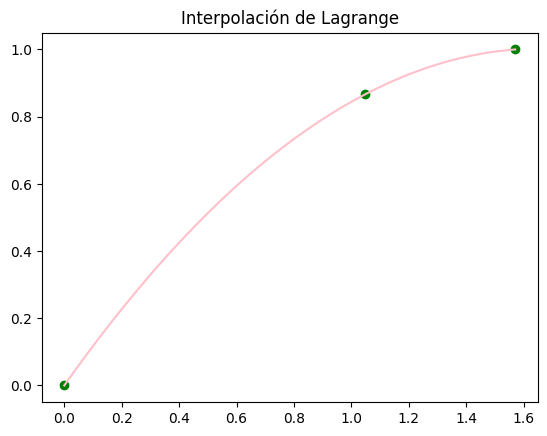

In [31]:
x1 = np.linspace(0, np.pi/2, 100)
y1 = Interpolate(x1,X,Y)
#Punto b
plt.scatter(X,Y,color='green')
plt.title('Interpolación de Lagrange')
plt.plot(x1,y1, color='pink')

In [32]:
#punto c
valor = poly.subs(x,np.sin(np.pi/8))
print(valor)

0.408936229092834


In [33]:
#punto d
error=np.abs(np.sin(np.pi/8)-valor)
print(error)

0.0262527967277440
